In [1]:
import pandas as pd
import numpy as np
from statsbombpy import sb

In [55]:
data = sb.competitions()

/Applications/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [61]:
sb.matches(competition_id=2,season_id=27)

/Applications/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [63]:
events = sb.events(match_id=3754078)

/Applications/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [37]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_shot_saved_off_target',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won'

In [67]:
events = events[['team','type','minute','location','player']]
events = events[events['team']=='Chelsea'].reset_index()

In [69]:
events.head()

,index,team,type,minute,location,player
0,0,Chelsea,Starting XI,0,NaN,NaN
1,3,Chelsea,Half Start,0,NaN,NaN
2,4,Chelsea,Half Start,45,NaN,NaN
3,10,Chelsea,Pass,0,"[42.7, 36.1]",Eden Hazard
4,11,Chelsea,Pass,0,"[34.3, 46.1]",Francesc Fàbregas i Soler


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [79]:
#apply pd series to location to split it into x and y
events.head()

,index,team,type,minute,player,x,y
0,0,Chelsea,Starting XI,0,NaN,NaN,NaN
1,3,Chelsea,Half Start,0,NaN,NaN,NaN
2,4,Chelsea,Half Start,45,NaN,NaN,NaN
3,10,Chelsea,Pass,0,Eden Hazard,42.7,36.1
4,11,Chelsea,Pass,0,Francesc Fàbregas i Soler,34.3,46.1


In [85]:
events['player'].unique()

array([nan, 'Eden Hazard', 'Francesc Fàbregas i Soler',
       'Oscar dos Santos Emboaba Júnior', 'Branislav Ivanović',
       'Gary Cahill', 'Diego da Silva Costa', 'César Azpilicueta Tanco',
       'Willian Borges da Silva', 'Nemanja Matić', 'John Terry',
       'Thibaut Courtois', 'Asmir Begović', 'Kurt Happy Zouma',
       'Radamel Falcao García Zárate'], dtype=object)

In [87]:
events = events[events['player']=='Eden Hazard'].reset_index()

In [89]:
events

,level_0,index,team,type,minute,player,x,y
0,3,10,Chelsea,Pass,0,Eden Hazard,42.7,36.1
1,6,13,Chelsea,Pass,0,Eden Hazard,77.7,44.3
2,17,25,Chelsea,Pass,2,Eden Hazard,87.0,8.3
3,27,44,Chelsea,Pass,3,Eden Hazard,85.3,0.1
4,53,99,Chelsea,Pass,8,Eden Hazard,89.0,33.8
...,...,...,...,...,...,...,...,...
228,1626,3211,Chelsea,Miscontrol,57,Eden Hazard,117.4,3.1
229,1629,3218,Chelsea,Block,3,Eden Hazard,105.9,24.9
230,1636,3232,Chelsea,Block,44,Eden Hazard,81.2,36.9
231,1646,3249,Chelsea,Block,81,Eden Hazard,107.7,21.3


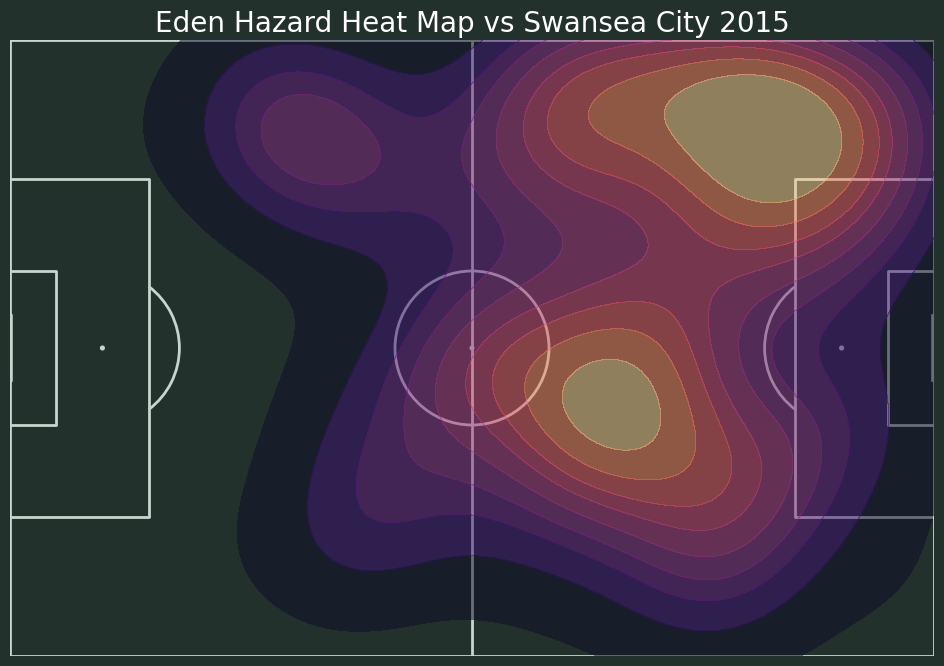

In [119]:
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('#22312b')  
ax.patch.set_facecolor('#22312b') 


pitch = Pitch(
    pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc'
)
pitch.draw(ax=ax)


kde = sns.kdeplot(
    x=events['x'], y=events['y'],  
    fill=True,                     
    alpha=0.5,
    levels=10,
    cmap='magma'
)

ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
plt.gca().invert_yaxis()  

plt.title('Eden Hazard Heat Map vs Swansea City 2015', color='white', size=20)
plt.show()